<h1> NumMobility Interpolation </h1>
<h2> Random Walk and Kinematic Interpolation</h2>
<p>
    This Notebook contains the examples for Radnom Walk and Kinematic Interpolations.
    It reads a file and interpolates points first using Random Walk and then Kinematic
    interpolation method by providing the dataframe and a time difference
    threshold beyond which points need to be interpolated and the interpolation
    type which by default is linear. The original data, and interpolated datas are
    all plotted to show the difference between trajectories. Segments of the original datas
    are taken and interpolated, and by plotting it a clear difference in the interpolation points are shown.
</p>

<hr>

The following datasets have been :
<ul>
   <li> <a href="https://github.com/YakshHaranwala/NumMobility/blob/main/examples/data/geolife_sample.csv" target="_blank"> Geolife-Sample </a> </li>
   <li> <a href="https://github.com/YakshHaranwala/NumMobility/blob/main/examples/data/gulls.csv" target="_blank"> Seagulls Dataset </a> </li>
   <li> <a href="https://github.com/YakshHaranwala/NumMobility/blob/main/examples/data/atlantic.csv%22%3E"> Hurricane Dataset </a> </li>
</ul>

In [1]:
from core.TrajectoryDF import NumPandasTraj as TrajDF
from preprocessing.interpolation import Interpolation as ip
from utilities.conversions import Conversions as con

import matplotlib.pyplot as plt
import utilities.constants as const
import pandas as pd


In [2]:
%%time

# Reading the gulls dataset and converting to NumPandasTraj.
# Also, lets, print the first 5 points of the dataset to
# see how the dataframe looks.
gulls = pd.read_csv('./data/gulls.csv')
np_gulls = TrajDF(gulls,
                  latitude='location-lat',
                  longitude='location-long',
                  datetime='timestamp',
                  traj_id='tag-local-identifier',
                  rest_of_columns=[])
np_gulls.head()

CPU times: user 264 ms, sys: 27.7 ms, total: 291 ms
Wall time: 290 ms


event-id  visible       lon       lat  \
traj_id DateTime                                                       
91732   2009-05-27 14:00:00  1082620685     True  24.58617  61.24783   
        2009-05-27 20:00:00  1082620686     True  24.58217  61.23267   
        2009-05-28 05:00:00  1082620687     True  24.53133  61.18833   
        2009-05-28 08:00:00  1082620688     True  24.58200  61.23283   
        2009-05-28 14:00:00  1082620689     True  24.58250  61.23267   

                            sensor-type individual-taxon-canonical-name  \
traj_id DateTime                                                          
91732   2009-05-27 14:00:00         gps                    Larus fuscus   
        2009-05-27 20:00:00         gps                    Larus fuscus   
        2009-05-28 05:00:00         gps                    Larus fuscus   
        2009-05-28 08:00:00         gps                    Larus fuscus   
        2009-05-28 14:00:00         gps                    Larus fuscus   

                            individual-local-identifier  \
traj_id DateTime                                          
91732   2009-05-27 14:00:00                      91732A   
        2009-05-27 20:00:00                      91732A   
        2009-05-28 05:00:00                      91732A   
        2009-05-28 08:00:00                      91732A   
        2009-05-28 14:00:00                      91732A   

                                                                    study-name  
traj_id DateTime                                                                
91732   2009-05-27 14:00:00  Navigation experiments in lesser black-backed ...  
        2009-05-27 20:00:00  Navigation experiments in lesser black-backed ...  
        2009-05-28 05:00:00  Navigation experiments in lesser black-backed ...  
        2009-05-28 08:00:00  Navigation experiments in lesser black-backed ...  
        2009-05-28 14:00:00  Navigation experiments in lesser black-backed ...

In [3]:
# Plot the trajectory.
np_gulls.plot_folium_traj()

In [4]:
%%time

# Here, Interpolate the original atlantic hurricane dataset
# using Random-Walk interpolation and then show the difference in
# the number of points to see how the dataframe's trajectories
# have been interpolated.

# rw_ip_gulls = ip.interpolate_position(dataframe=np_gulls,
#                                       time_jump=4,
#                                       ip_type='random-walk')
# print(f"Original DF length: {len(np_gulls)}")
# print(f"Linear Original DF length: {len(rw_ip_gulls)}")

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs


In [5]:
# Here, we will filter out a single trajectory from the atlantic
# dataset and check how many of the trajectory's points have
# time jump greater than what the examples are using to interpolate

small_gulls = np_gulls.reset_index().loc[np_gulls.reset_index()[const.TRAJECTORY_ID] == '91732'][[const.TRAJECTORY_ID, const.DateTime, const.LAT, const.LONG]]
time_del = small_gulls.reset_index()[const.DateTime].diff().dt.total_seconds()
print((time_del > 3600*4).value_counts())


True     1501
False     469
Name: DateTime, dtype: int64


In [6]:
%%time

# Now, on the smaller dataframe containing only a single
# trajectory from the original dataframe, interpolate the
# trajectory using random-walk interpolation.

small_rw_gulls = ip.interpolate_position(small_gulls,
                                          3600*4,
                                          ip_type='random-walk')
print(f"Original Length: {len(small_gulls)}")
print(f"Interpolated Length: {len(small_rw_gulls)}")

Original Length: 1970
Interpolated Length: 3471
CPU times: user 27.4 ms, sys: 16 ms, total: 43.4 ms
Wall time: 4.07 s


In [7]:
%%time

# Now, on the smaller dataframe containing only a single
# trajectory from the original dataframe, interpolate the
# trajectory using kinematic interpolation.

small_kin_gulls = ip.interpolate_position(small_gulls,
                                          3600*4,
                                          ip_type='kinematic')
print(f"Original Length: {len(small_gulls)}")
print(f"Interpolated Length: {len(small_kin_gulls)}")

Original Length: 1970
Interpolated Length: 3470
CPU times: user 27.2 ms, sys: 15.7 ms, total: 42.9 ms
Wall time: 4.44 s


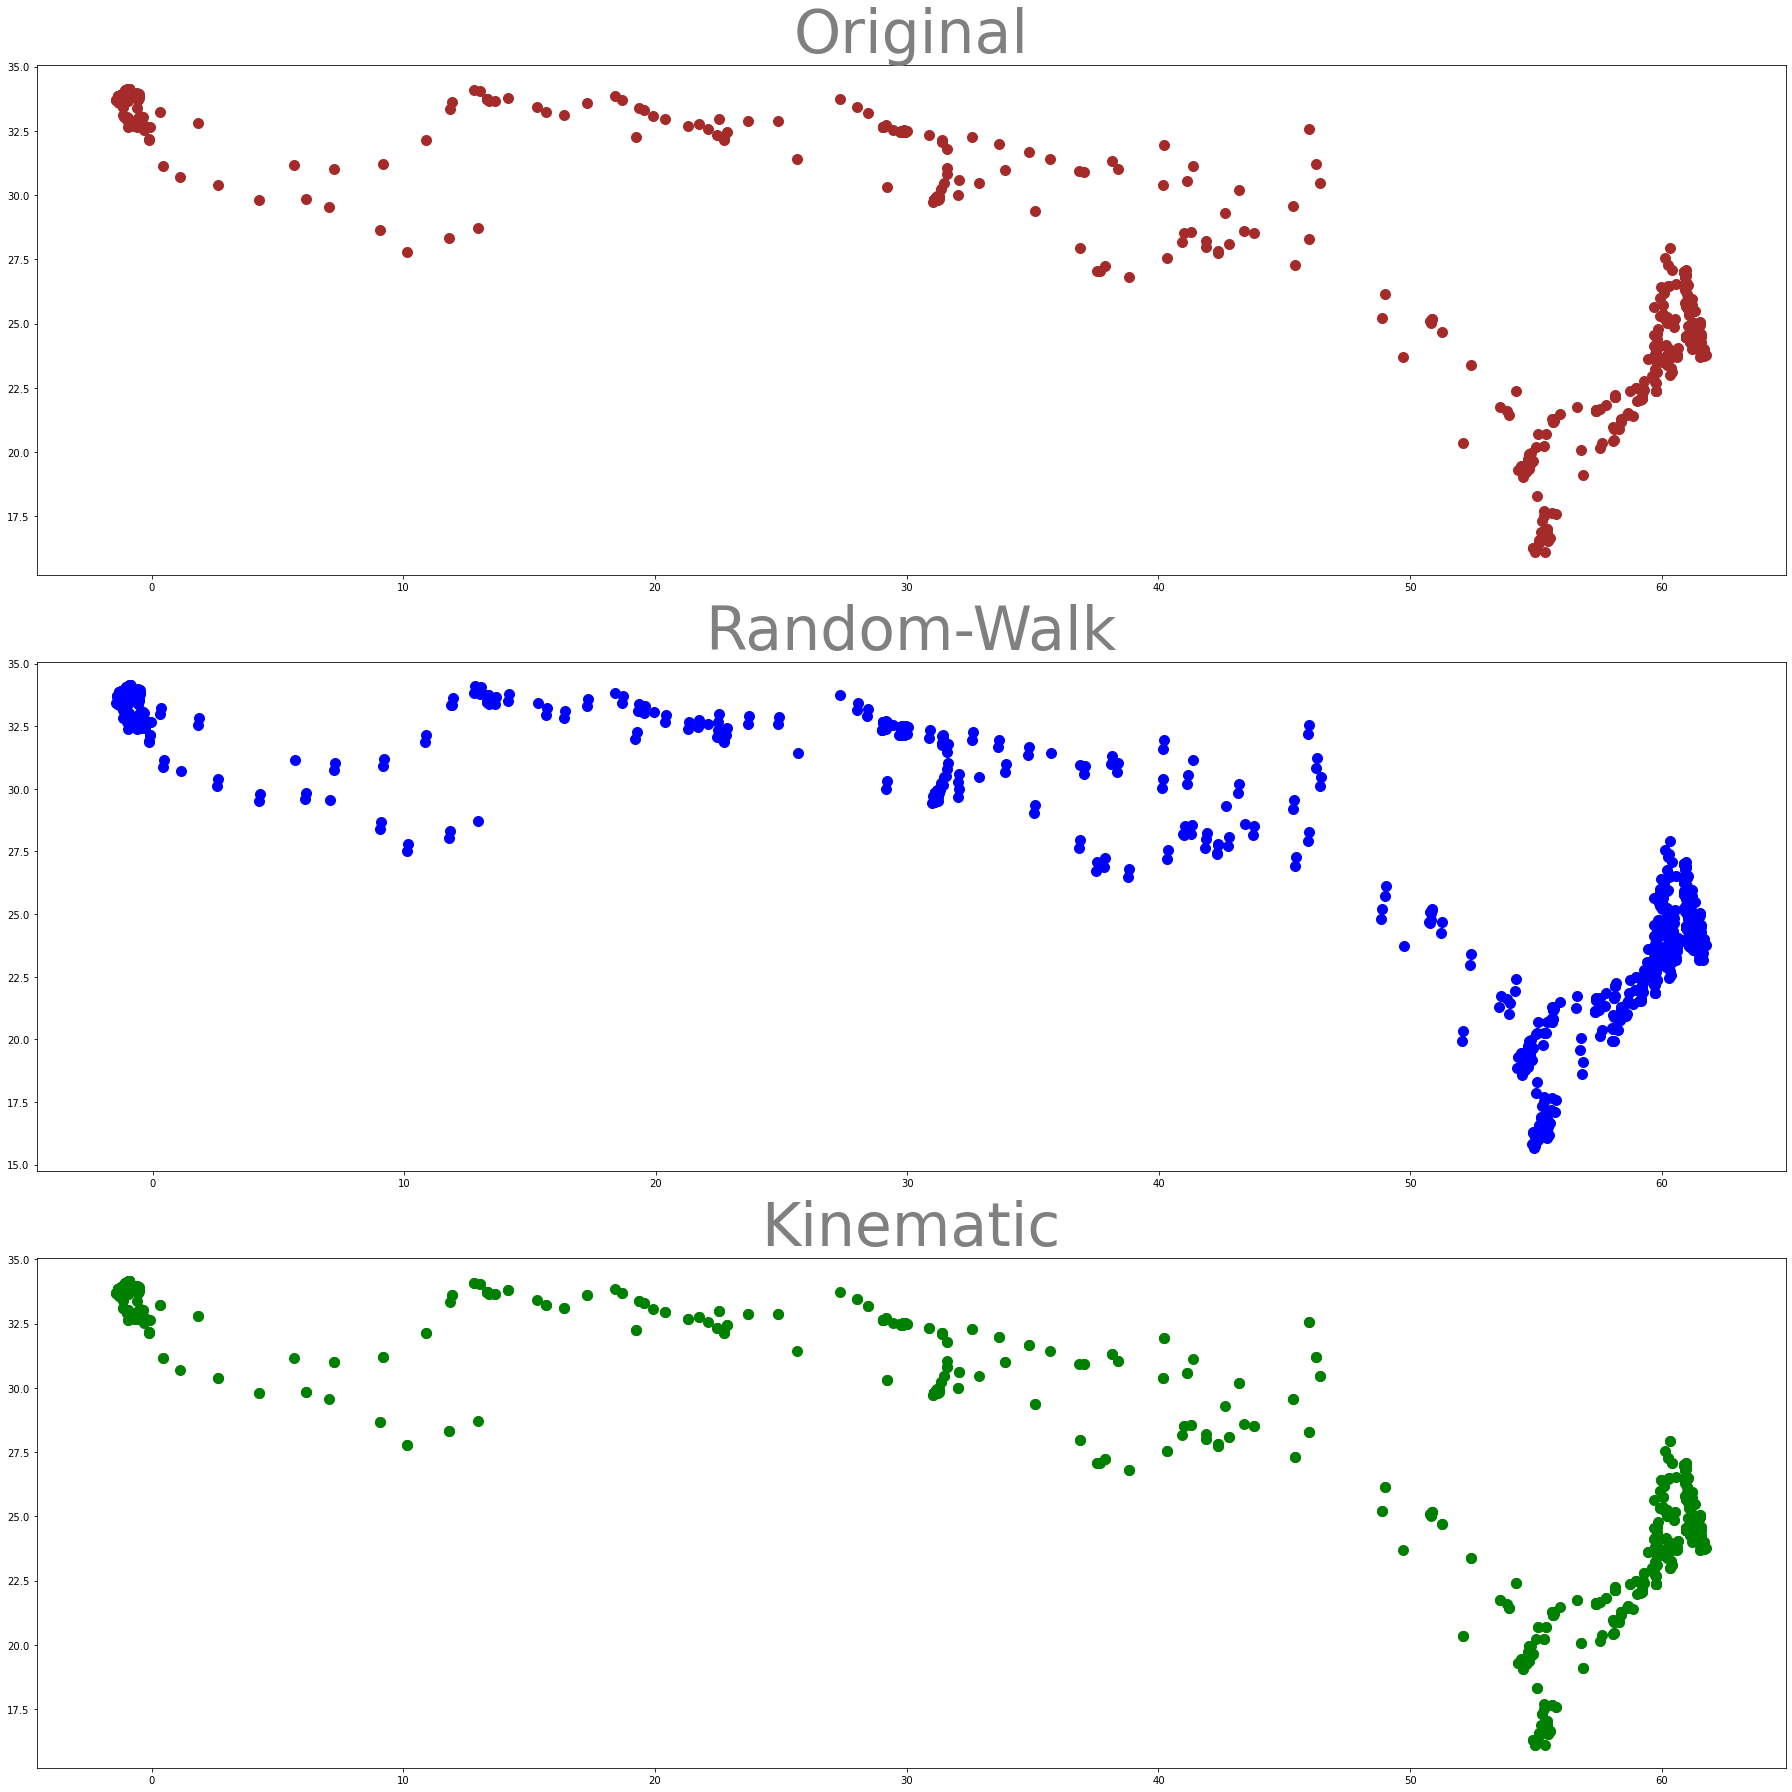

In [28]:
# Here, plot the scatter points of following 3 trajectories:
# 1. Original Small DF.
# 2. Linear-Interpolated Small DF.
# 3. Cubic-Interpolated Small DF.
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(25, 25))
axes[0].scatter(small_gulls[const.LAT],
                small_gulls[const.LONG],
                s=100, color='brown')
axes[0].set_title('Original', fontsize=60, color='grey')
axes[1].scatter(small_rw_gulls[const.LAT],
                small_rw_gulls[const.LONG],
                s=100, color='blue')
axes[1].set_title('Random-Walk', fontsize=60, color='grey')
axes[2].scatter(small_kin_gulls[const.LAT],
                small_kin_gulls[const.LONG],
                s=100, color='green')
axes[2].set_title('Kinematic', fontsize=60, color='grey')

fig.tight_layout()

In [9]:
"""
    1. Reading the atlantic dataset, cleaning it up and then
       converting it to NumPandasTraj.
    2. It is to be noted that apart from reading the dataset,
       before converting to NumPandasTraj, the dataframe needs
       some cleanup as the Time format provided in the dataframe
       needs to be first converted into a library supported time
       format. Also, the format of the coordinates need to be
       converted to library supported format before converting'
       it to NumPandasTraj.
    3. Also, lets, print the first 5 points of the dataset to
      see how the dataframe looks.
"""
atlantic = pd.read_csv('./data/atlantic.csv')
atlantic = con.convert_directions_to_degree_lat_lon(atlantic, 'Latitude',"Longitude")
def convert_to_datetime(row):
        this_date = '{}-{}-{}'.format(str(row['Date'])[0:4], str(row['Date'])[4:6], str(row['Date'])[6:])
        this_time = '{:02d}:{:02d}:00'.format(int(row['Time']/100), int(str(row['Time'])[-2:]))
        return '{} {}'.format(this_date, this_time)
atlantic['DateTime'] = atlantic.apply(convert_to_datetime, axis=1)
np_atlantic = TrajDF(atlantic,
                     latitude='Latitude',
                     longitude='Longitude',
                     datetime='DateTime',
                     traj_id='ID')

In [10]:
# Plot the trajectory.
# np_atlantic.plot_folium_traj()

In [11]:
%%time

# Here, Interpolate the original atlantic hurricane dataset
# using Random-Walk interpolation and then show the difference in
# the number of points to see how the dataframe's trajectories
# have been interpolated.

# rw_ip_atlantic = ip.interpolate_position(dataframe=np_atlantic,
#                                          time_jump=4,
#                                          ip_type='random-walk')
# print(f"Original DF length: {len(np_atlantic)}")
# print(f"Linear Original DF length: {len(rw_ip_atlantic)}")

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.29 µs


In [12]:
# Here, we will filter out a single trajectory from the atlantic
# dataset and check how many of the trajectory's points have
# time jump greater than what the examples are using to interpolate

small_atlantic = np_atlantic.reset_index().loc[np_atlantic.reset_index()[const.TRAJECTORY_ID] == 'AL062010'][[const.TRAJECTORY_ID, const.DateTime, const.LAT, const.LONG]]
time_del = small_gulls.reset_index()[const.DateTime].diff().dt.total_seconds()
print((time_del > 3600*4).value_counts())


True     1501
False     469
Name: DateTime, dtype: int64


In [13]:
%%time

# Now, on the smaller dataframe containing only a single
# trajectory from the original dataframe, interpolate the
# trajectory using random-walk interpolation.

small_rw_atlantic = ip.interpolate_position(small_atlantic,
                                            3600*4,
                                            ip_type='random-walk')
print(f"Original Length: {len(small_atlantic)}")
print(f"Interpolated Length: {len(small_rw_atlantic)}")

Original Length: 51
Interpolated Length: 101
CPU times: user 11.8 ms, sys: 16 ms, total: 27.8 ms
Wall time: 322 ms


In [14]:
%%time

# Now, on the smaller dataframe containing only a single
# trajectory from the original dataframe, interpolate the
# trajectory using kinematic interpolation.

small_kin_atlantic = ip.interpolate_position(small_atlantic,
                                          3600*4,
                                          ip_type='kinematic')
print(f"Original Length: {len(small_atlantic)}")
print(f"Interpolated Length: {len(small_kin_atlantic)}")

Original Length: 51
Interpolated Length: 100
CPU times: user 6.02 ms, sys: 23.9 ms, total: 29.9 ms
Wall time: 330 ms


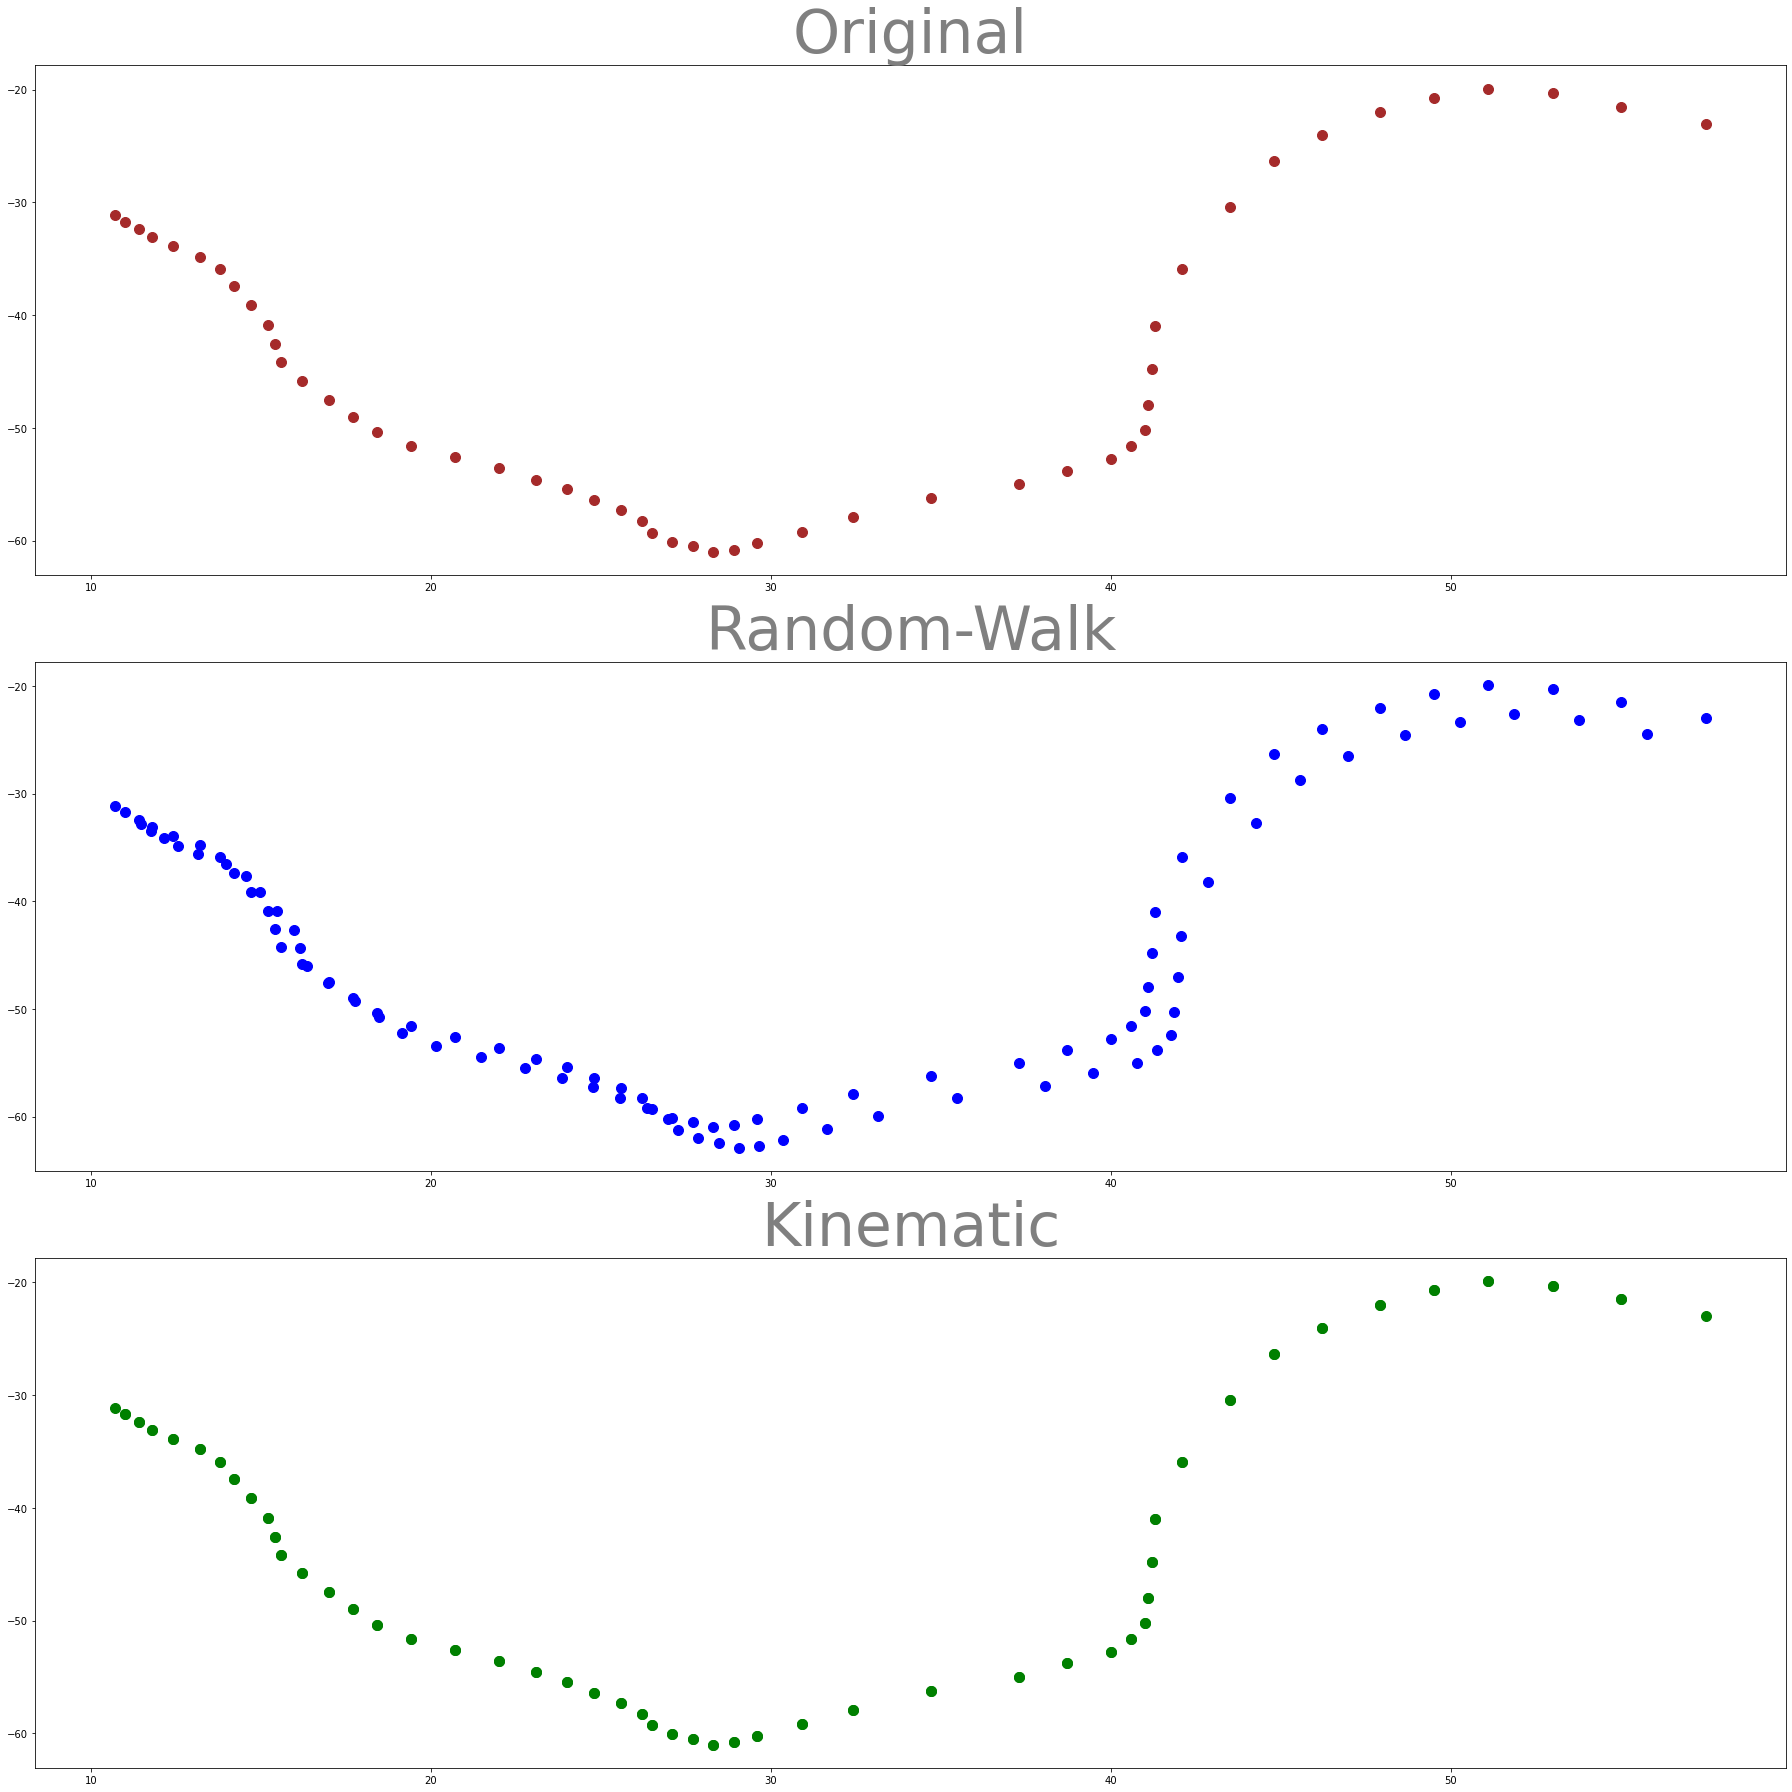

In [27]:
# Here, plot the scatter points of following 3 trajectories:
# 1. Original Small DF.
# 2. Linear-Interpolated Small DF.
# 3. Cubic-Interpolated Small DF.
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(25, 25))
axes[0].scatter(small_atlantic[const.LAT],
                small_atlantic[const.LONG],
                s=100, color='brown')
axes[0].set_title('Original', fontsize=60, color='grey')
axes[1].scatter(small_rw_atlantic[const.LAT],
                small_rw_atlantic[const.LONG],
                s=100, color='blue')
axes[1].set_title('Random-Walk', fontsize=60, color='grey')
axes[2].scatter(small_kin_atlantic[const.LAT],
                small_kin_atlantic[const.LONG],
                s=100, color='green')
axes[2].set_title('Kinematic', fontsize=60, color='grey')

fig.tight_layout()

In [16]:
%%time

# Reading the geolife dataset and converting to NumPandasTraj.
# Also, lets, print the first 5 points of the datset to
# see how the dataframe looks.
rf = pd.read_csv('./data/geolife_sample.csv')
np_geolife = TrajDF(rf,
                    latitude='lat',
                    longitude='lon',
                    datetime='datetime',
                    traj_id='id')

CPU times: user 484 ms, sys: 24.1 ms, total: 508 ms
Wall time: 506 ms


In [17]:
# Plot the trajectory.
# np_atlantic.plot_folium_traj()

In [18]:
# %%time
#
# # Here, Interpolate the original atlantic hurricane dataset
# # using Random-Walk interpolation and then show the difference in
# # the number of points to see how the dataframe's trajectories
# # have been interpolated.
#
# rw_ip_geolife = ip.interpolate_position(dataframe=np_geolife,
#                                         time_jump=4,
#                                         ip_type='random-walk')
# print(f"Original DF length: {len(np_geolife)}")
# print(f"Linear Original DF length: {len(rw_ip_geolife)}")

In [19]:
# Here, we will filter out a single trajectory from the atlantic
# dataset and check how many of the trajectory's points have
# time jump greater than what the examples are using to interpolate

small_geolife = np_geolife.reset_index().loc[np_geolife.reset_index()[const.TRAJECTORY_ID] == '1'][[const.TRAJECTORY_ID, const.DateTime, const.LAT, const.LONG]]
time_del = small_geolife.reset_index()[const.DateTime].diff().dt.total_seconds()
print((time_del > 5).value_counts())

False    107933
True        674
Name: DateTime, dtype: int64


In [23]:
%%time

# Now, on the smaller dataframe containing only a single
# trajectory from the original dataframe, interpolate the
# trajectory using random-walk interpolation.

small_rw_geolife = ip.interpolate_position(small_geolife,
                                            4,
                                            ip_type='random-walk')
print(f"Original Length: {len(small_geolife)}")
print(f"Interpolated Length: {len(small_rw_geolife)}")

Original Length: 108607
Interpolated Length: 159581
CPU times: user 133 ms, sys: 36.2 ms, total: 169 ms
Wall time: 5min 37s


In [24]:
%%time

# Now, on the smaller dataframe containing only a single
# trajectory from the original dataframe, interpolate the
# trajectory using kinematic interpolation.

small_kin_geolife = ip.interpolate_position(small_geolife,
                                            4,
                                            ip_type='kinematic')
print(f"Original Length: {len(small_geolife)}")
print(f"Interpolated Length: {len(small_kin_geolife)}")

Original Length: 108607
Interpolated Length: 159580
CPU times: user 112 ms, sys: 52 ms, total: 164 ms
Wall time: 5min 48s


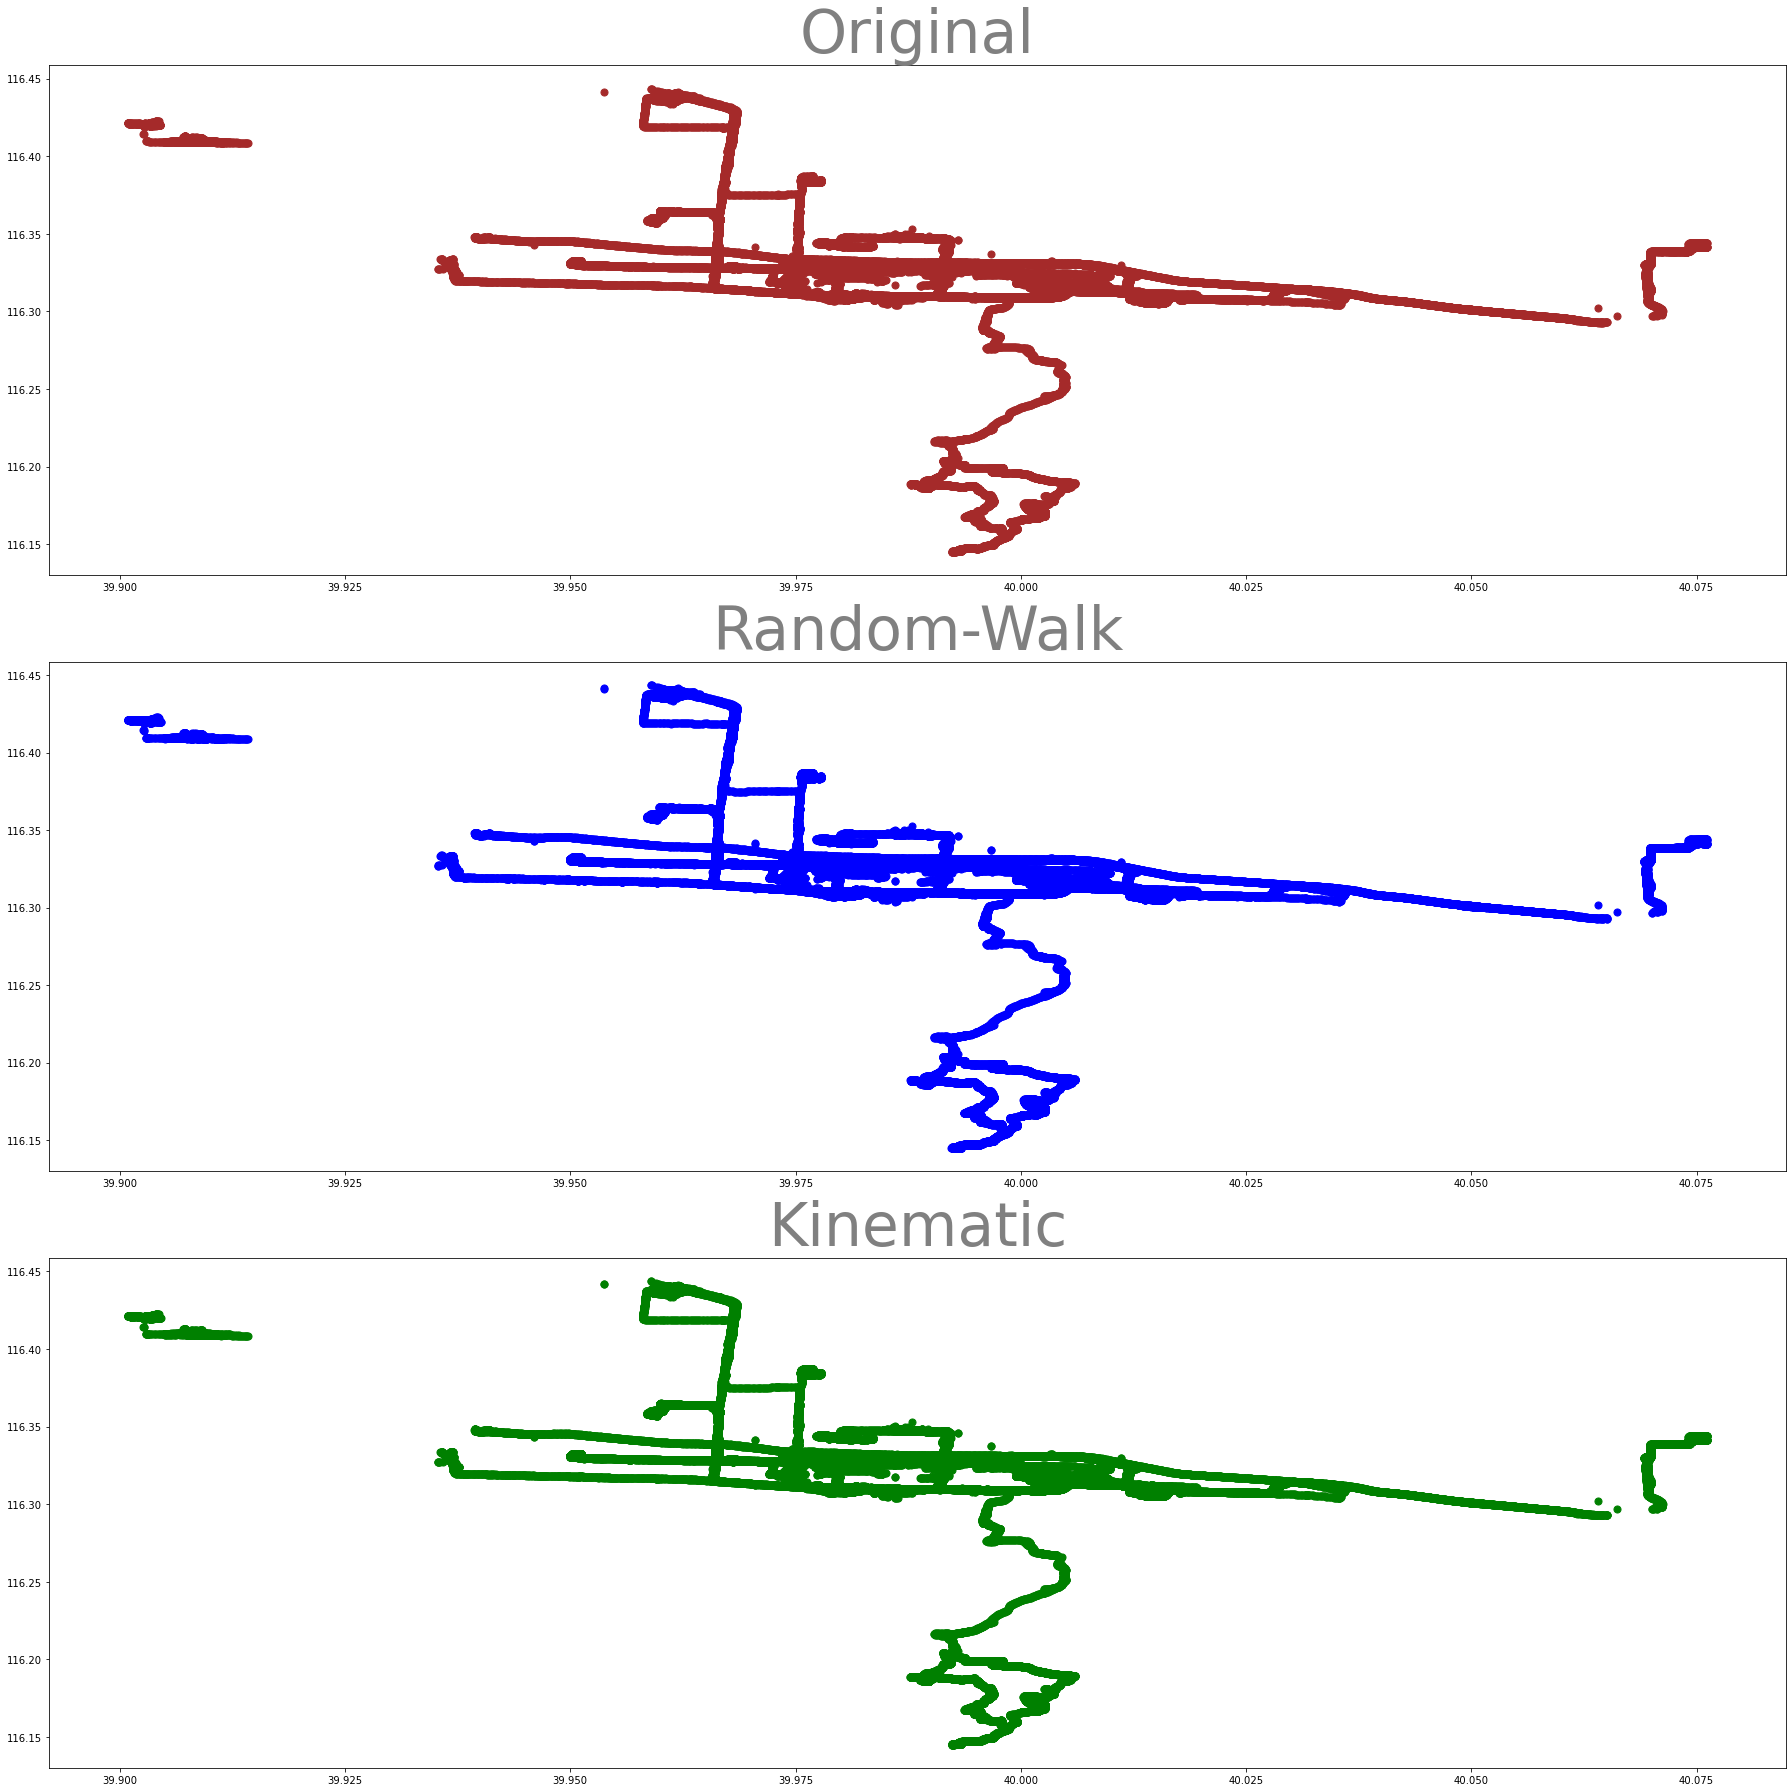

In [26]:
# Here, plot the scatter points of following 3 trajectories:
# 1. Original Small DF.
# 2. Linear-Interpolated Small DF.
# 3. Cubic-Interpolated Small DF.
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(25, 25))
axes[0].scatter(small_geolife[const.LAT],
                small_geolife[const.LONG],
                s=50, color='brown')
axes[0].set_title('Original', fontsize=60, color='grey')
axes[1].scatter(small_rw_geolife[const.LAT],
                small_rw_geolife[const.LONG],
                s=50, color='blue')
axes[1].set_title('Random-Walk', fontsize=60, color='grey')
axes[2].scatter(small_kin_geolife[const.LAT],
                small_kin_geolife[const.LONG],
                s=50, color='green')
axes[2].set_title('Kinematic', fontsize=60, color='grey')

fig.tight_layout()